In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Menu Items.csv")

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df.head()

,Restaurant,Section,Item,Description,Price
0,bel aire restaurant diner,cocktails must be 0 to purchase,mixed cocktail must be 0 to purchase,must be 0 to purchase choice of liquor and mix...,$7.99
1,bel aire restaurant diner,cocktails must be 0 to purchase,shots shots shots must be 0 to purchase,must be 0 to purchase choice of jose cuervo ja...,$3.99
2,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz wine cup must be 0 to purchase,must be 0 to purchase specify chardonnay red b...,$5.99
3,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz absolut lemonade must be 0 to purchase,must be 0 to purchase classic lemonade with a ...,$4.99
4,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz peach sour must be 0 to purchase,must be 0 to purchase bushmill s whiskey muddl...,$7.99


In [5]:
df = df[(~df['Description'].isna()) & (~df['Item'].isna())].drop_duplicates()
df['Price'] = df['Price'].str.replace("$","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [6]:
df.dtypes

Restaurant      object
Section         object
Item            object
Description     object
Price          float64
dtype: object

In [7]:
df['max_price'] = df.groupby('Restaurant')['Price'].transform('max')
df['min_price'] = df.groupby('Restaurant')['Price'].transform('min')
df['avg_price'] = df.groupby('Restaurant')['Price'].transform('mean')

In [8]:
df_maxprice = df[df['Price']==df['max_price']]
df_minprice = df[df['Price']==df['min_price']]

In [9]:
## Items which are priced high wrt to other menu items for each restaurant
df_maxprice.to_csv("high_prices_items.csv")

## Items which are priced low wrt to other menu items for each restaurant
df_minprice.to_csv("low_prices_items.csv")

In [10]:
df1 = df.drop_duplicates('Restaurant')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


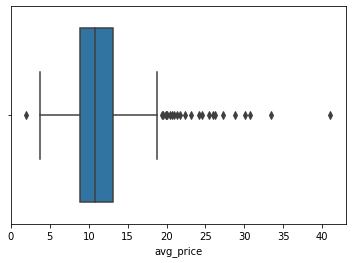

In [11]:
import seaborn as sns
sns.boxplot(df1['avg_price'])

In [12]:
## Restaurants which have higher prices wrt other restaurants
df1[df1['avg_price']>30]

,Restaurant,Section,Item,Description,Price,max_price,min_price,avg_price
4013,gaucho grill,shared items,prawns and palms,tiger prawns hearts of palm avocado mint basil...,18.20,130.00,5.20,33.427358
10426,baklava factory sherman way,holiday assortment,assorted medium sheet 0 0 piece,medium tray 0 x 0 shredded wheat dough rolled ...,34.99,61.99,17.99,30.042632
18860,antonio s catering,salads and entree trays,house salad,mixed greens and vegetables,30.00,55.00,18.50,41.038462
20073,0 wing spot,wings,0 wings,two flavors and one dip,13.99,62.99,3.00,30.705714


In [13]:
## Restaurants which have lower prices wrt other restaurants
df1[df1['avg_price']<5]

,Restaurant,Section,Item,Description,Price,max_price,min_price,avg_price
6826,flakos takos lodi,del mar,mariachi taco,bacon wrapped shrimp in a tortilla with house ...,4.49,4.49,4.49,4.490000
15511,the dessert stand,cupcake,birthday cake cupcake,classic vanilla cupcake with vanilla buttercre...,4.50,7.50,2.75,4.954632
30607,chopt creative salad co,snacks,sea salt caramel 0ea,0 cals,0.69,2.99,0.69,1.922143
34269,tweeny s liquor and pizza,salads,chef salad,lettuce tomatoes black olives banana peppers h...,3.99,4.99,3.49,3.872353
39180,blvd cafecito,tea,spiced chai latte,vegan,4.00,4.00,4.00,4.000000
43773,pekoe sip house,chai,house chai,traditional organic black tea blend for wholes...,3.75,6.95,2.15,3.775000


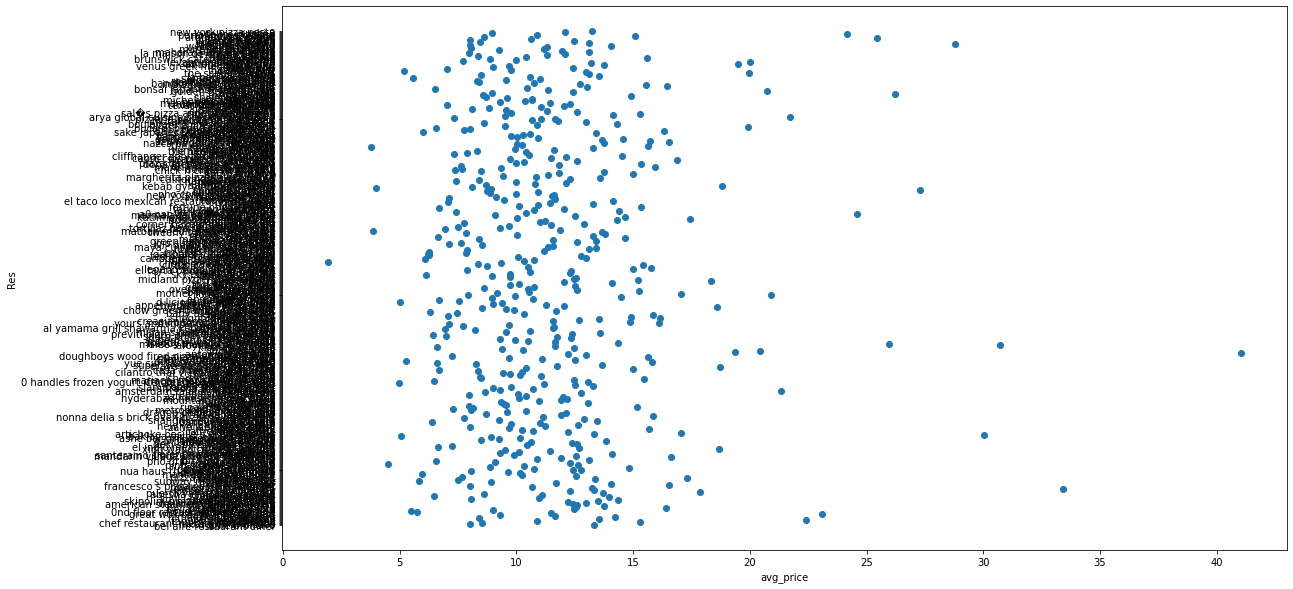

In [14]:
# Scatter plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df1['avg_price'], df1['Restaurant'])
 
# x-axis label
ax.set_xlabel('avg_price')
 
# y-axis label
ax.set_ylabel('Res')
plt.show()